# Requirements

In [219]:
# Add as many imports as you need.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,LSTM,Dense
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the primary objective is to use Long Short-Term Memory (LSTM) networks for time series forecasting in order to predict the current **mean temperature** in the city of Delhi. To accomplish this use data from the past three days, which includes information such as the **mean temperature**, **humidity**, **wind speed**, and **mean pressure**. The goal is to employ LSTM, a type of recurrent neural network, to effectively forecast the future mean temperature based on the provided historical data.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [182]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('../datasets/climate-data(1).csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [183]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


Explore the dataset using visualizations of your choice.

<Axes: >

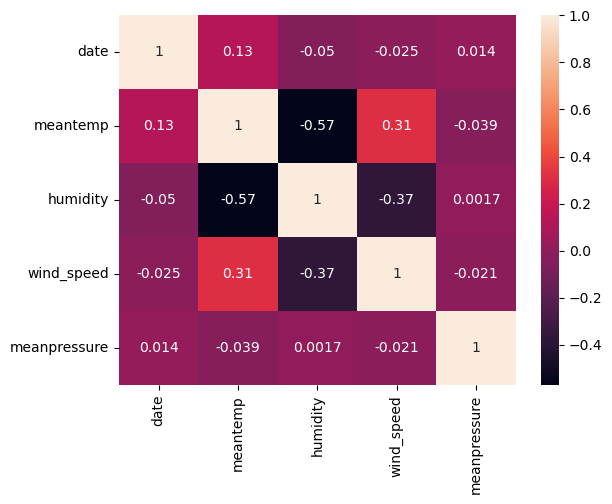

In [184]:
# Write your code here. Add as many boxes as you need.
sns.heatmap(df.corr(),annot=True)

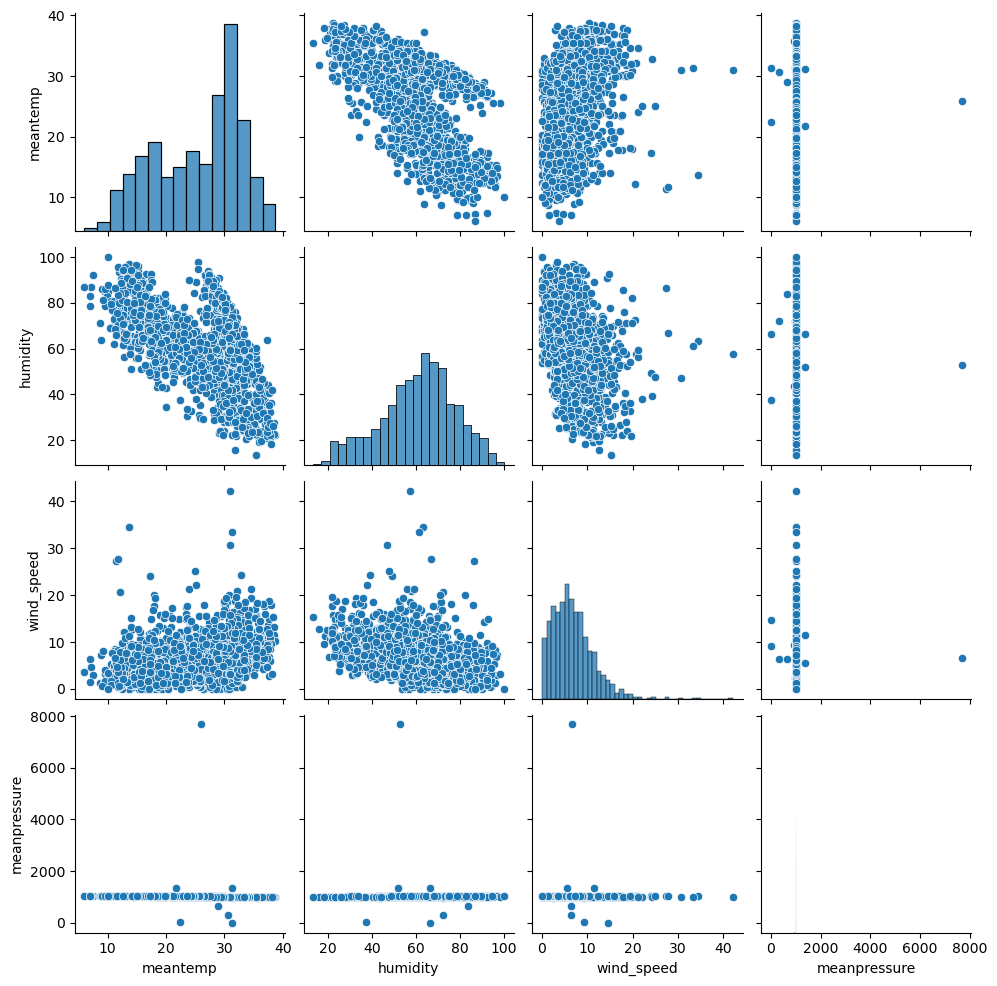

In [185]:
sns.pairplot(df)

## Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

*Be careful when extracting the features. For each day, ensure that features are obtained sequentially, starting with those from 3 days ago, followed by features from 2 days ago, and finally, features from 1 day ago. This becomes crucial when reshaping the train and test sets later on.*

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [186]:
df.drop(['date'],axis=1,inplace=True)

In [187]:
# Write your code here. Add as many boxes as you need.
lag = 3
periods = range(lag,0,-1)
df_lag = df.shift(periods)
df_lag

,meantemp_3,humidity_3,wind_speed_3,meanpressure_3,meantemp_2,humidity_2,wind_speed_2,meanpressure_2,meantemp_1,humidity_1,wind_speed_1,meanpressure_1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,84.500000,0.000000,1015.666667
2,NaN,NaN,NaN,NaN,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000
3,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
4,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
1457,14.000000,94.300000,9.085000,1014.350000,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000
1458,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217
1459,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762
1460,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762,14.095238,89.666667,6.266667,1017.904762


In [188]:
df = pd.concat([df,df_lag],axis=1)
df.dropna(inplace=True)

In [189]:
df

,meantemp,humidity,wind_speed,meanpressure,meantemp_3,humidity_3,wind_speed_3,meanpressure_3,meantemp_2,humidity_2,wind_speed_2,meanpressure_2,meantemp_1,humidity_1,wind_speed_1,meanpressure_1
3,8.666667,71.333333,1.233333,1017.166667,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
4,6.000000,86.833333,3.700000,1016.500000,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
5,7.000000,82.800000,1.480000,1018.000000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000
6,7.000000,78.600000,6.300000,1020.000000,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000
7,8.857143,63.714286,7.142857,1018.714286,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,17.217391,68.043478,3.547826,1015.565217,14.000000,94.300000,9.085000,1014.350000,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000
1458,15.238095,87.857143,6.000000,1016.904762,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217
1459,14.095238,89.666667,6.266667,1017.904762,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762
1460,15.052632,87.000000,7.325000,1016.100000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762,14.095238,89.666667,6.266667,1017.904762


## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [190]:
df.drop(['humidity','wind_speed','meanpressure'],inplace=True,axis=1)

In [191]:
df.head()

,meantemp,meantemp_3,humidity_3,wind_speed_3,meanpressure_3,meantemp_2,humidity_2,wind_speed_2,meanpressure_2,meantemp_1,humidity_1,wind_speed_1,meanpressure_1
3,8.666667,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
4,6.000000,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
5,7.000000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000
6,7.000000,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000
7,8.857143,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000


In [192]:
# Write your code here. Add as many boxes as you need.
X = df.drop(['meantemp'],axis=1)
y = df['meantemp']

In [193]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,shuffle=False)

## Feauture Scaling
Scale the extracted features using an appropriate scaler.

In [194]:
# Write your code here. Add as many boxes as you need.
meantemp_scaler = MinMaxScaler()
humidity_scaler = MinMaxScaler()
wind_speed = MinMaxScaler()

In [195]:
meanpressure_scaler = MinMaxScaler()

In [196]:
X_train[['humidity_3','humidity_2','humidity_1']] = humidity_scaler.fit_transform(X_train[['humidity_3','humidity_2','humidity_1']])

In [197]:
X_test[['humidity_3','humidity_2','humidity_1']] = humidity_scaler.transform(X_test[['humidity_3','humidity_2','humidity_1']])

In [198]:
X_train[['wind_speed_3','wind_speed_2','wind_speed_1']] = wind_speed.fit_transform(X_train[['wind_speed_3','wind_speed_2','wind_speed_1']])

In [199]:
X_test[['wind_speed_3','wind_speed_2','wind_speed_1']] = wind_speed.transform(X_test[['wind_speed_3','wind_speed_2','wind_speed_1']])

In [200]:
X_train[['meanpressure_3','meanpressure_2','meanpressure_1']] = meanpressure_scaler.fit_transform(X_train[['meanpressure_3','meanpressure_2','meanpressure_1']])

In [201]:
X_test[['meanpressure_3','meanpressure_2','meanpressure_1']] = meanpressure_scaler.transform(X_test[['meanpressure_3','meanpressure_2','meanpressure_1']])

## Feature Reshaping

Reshape the feature dimensions into the shape `(samples, timesteps, features)`.

In [202]:
X_train.shape[1] // lag

4

In [203]:
# Write your code here. Add as many boxes as you need.
X_train = X_train.values.reshape(X_train.shape[0], lag, X_train.shape[1] // lag)


In [204]:
X_test = X_test.values.reshape(X_test.shape[0], lag, X_test.shape[1] // lag)


In [205]:
 X_train.shape[1] % lag 

0

## Long Short-Term Memory (LSTM) Network
Build a Long Short-Term Memory (LSTM) Network for forecasting the current **mean temperature** based on the extracted features from the previous three days.

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [206]:
# Write your code here. Add as many boxes as you need.
model = Sequential()

In [207]:
model.add(Input(shape=(lag,X_train.shape[2])))

In [208]:
model.add(LSTM(units=16,activation='relu',return_sequences=True))
model.add(LSTM(units=32,activation='relu'))

In [209]:
model.add(Dense(units=1))

Compile the previously defined model specifying **loss function** (`keras.losses`), **optimizer** (`keras.optimizers`) and **evaluation metrics** (`keras.metics`).

In [210]:
# Write your code here. Add as many boxes as you need.
model.compile(loss='mse',optimizer='adam')

Train the model on the training set, specifying the **batch size** and **number of epochs** for the training process. Allocate 20% of the samples for **validation**, and ensure that the dataset remains **unshuffled** during training.

In [211]:
# Write your code here. Add as many boxes as you need.
history = model.fit(X_train,y_train,batch_size=16,epochs=10,validation_split=0.2,shuffle=False)

Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 602.3093 - val_loss: 81.7739
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.9897 - val_loss: 9.2019
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9865 - val_loss: 5.8224
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0778 - val_loss: 5.7499
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0533 - val_loss: 5.7113
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0102 - val_loss: 5.6707
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0023 - val_loss: 5.6240
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0036 - val_loss: 5.5811
Epoch 9/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9962 - val_loss: 5.5415
Epoch 10/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9850 - val_loss: 5.5053


Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

In [214]:
history.history

{'loss': [560.9153442382812,
  16.49018669128418,
  5.634639263153076,
  5.056387424468994,
  5.086879730224609,
  5.076878070831299,
  5.0790276527404785,
  5.091434478759766,
  5.093029499053955,
  5.089240074157715],
 'val_loss': [81.77392578125,
  9.201919555664062,
  5.822351455688477,
  5.749873161315918,
  5.711273670196533,
  5.670716285705566,
  5.623957633972168,
  5.58112907409668,
  5.541516304016113,
  5.505314826965332]}

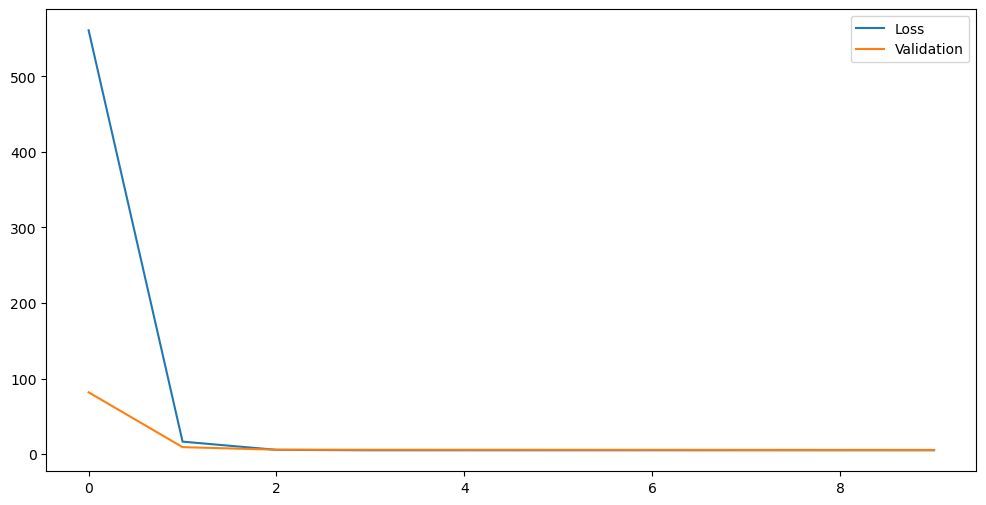

In [217]:
# Write your code here. Add as many boxes as you need.
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()
plt.show()

Use the trained model to make predictions for the test set.

In [218]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [220]:
# Write your code here. Add as many boxes as you need.
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f'R2 Score:{r2}')
print(f'Mean Absolute Error:{mae}')
print(f'Mean Squared Error:{mse}')

R2 Score:0.9172382100377223
Mean Absolute Error:1.2655621268714456
Mean Squared Error:2.694967802686252


Create a line plot in order to compare the actual and predicted mean temperatures for the test set.

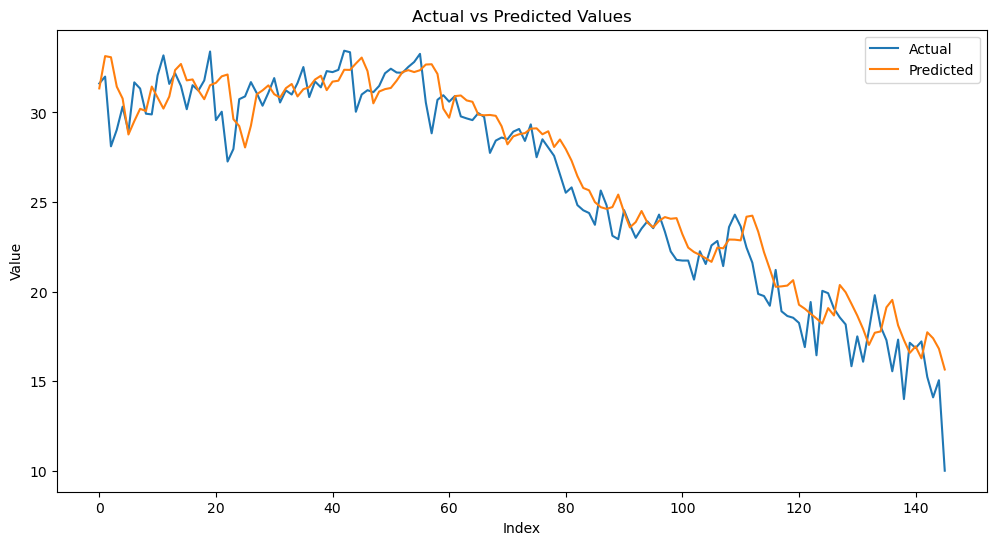

In [228]:
# Write your code here. Add as many boxes as you need.
y_test_flat = y_test.values if isinstance(y_test, pd.Series) else y_test
y_pred_flat = y_pred.values if isinstance(y_pred, pd.Series) else y_pred

# Combine y_pred and y_test into a DataFrame for easier plotting
results = pd.DataFrame({
    'Actual': y_test_flat.flatten() if len(y_test_flat.shape) > 1 else y_test_flat,
    'Predicted': y_pred_flat.flatten() if len(y_pred_flat.shape) > 1 else y_pred_flat
})

# Add an index column to use as the x-axis
results['Index'] = range(len(results))

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
sns.lineplot(data=results, x='Index', y='Actual', label='Actual')
sns.lineplot(data=results, x='Index', y='Predicted', label='Predicted')
plt.title("Actual vs Predicted Values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

As a bonus task for this laboratory exercise, calculate the Simple Moving Average (SMA) and Weighted Moving Average (WMA) with 3 timesteps for `mean_temperature` over the past 1, 2, and 3 days:

- **SMA with 3 timesteps ($\text{SMA}_3$)** - the average of temperatures from the previous 3 days:  
  $SMA_3 = \frac{\text{mean\_temperaure}_{lag\_3} +\ \text{mean\_temperaure}_{lag\_2} +\ \text{mean\_temperaure}_{lag\_1}}{1\ +\ 1\ +\ 1}$.

- **WMA with 3 timesteps ($\text{WMA}_3$)** - a weighted average, giving more importance to recent days:  
  $WMA_3 = \frac{1\ \cdot\ \text{mean\_temperaure}_{lag\_3} +\ 2\ \cdot\ \text{mean\_temperaure}_{lag\_2} +\ 3\ \cdot\ \text{mean\_temperaure}_{lag_1}}{1\ +\ 2\ +\ 3}$.

Then use this indicators alongside the other features in the dataset to predict the `mean_temperaure`.

*Hint: Use the `rolling` method from `pandas`. Check the docs at the following link https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html.*

In [ ]:
# Write your code here. Add as many boxes as you need.